<a href="https://colab.research.google.com/github/emanuel379/Analise-de-Sobrevivencia-e-Confiabilidade/blob/main/Visualiza%C3%A7%C3%A3o_de_dados_laringe_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autores: Ada Maris Pereira Mário e Emanuel Victor da Silva Favorato

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Lendo o arquivo txt
data = pd.read_csv('laringe.txt', delimiter='\s+', skipinitialspace=True)

#Removendo espaços em branco no início e no fim dos nomes das colunas
data.columns = data.columns.str.strip()

# Observando o conjunto de dados
data

,id,tempos,cens,idade,estagio
0,1,0.6,1,77,1
1,2,1.3,1,53,1
2,3,2.4,1,45,1
3,4,3.2,1,58,1
4,5,3.3,1,76,1
...,...,...,...,...,...
85,86,2.3,1,62,4
86,87,3.6,1,71,4
87,88,3.8,1,84,4
88,89,2.9,0,74,4


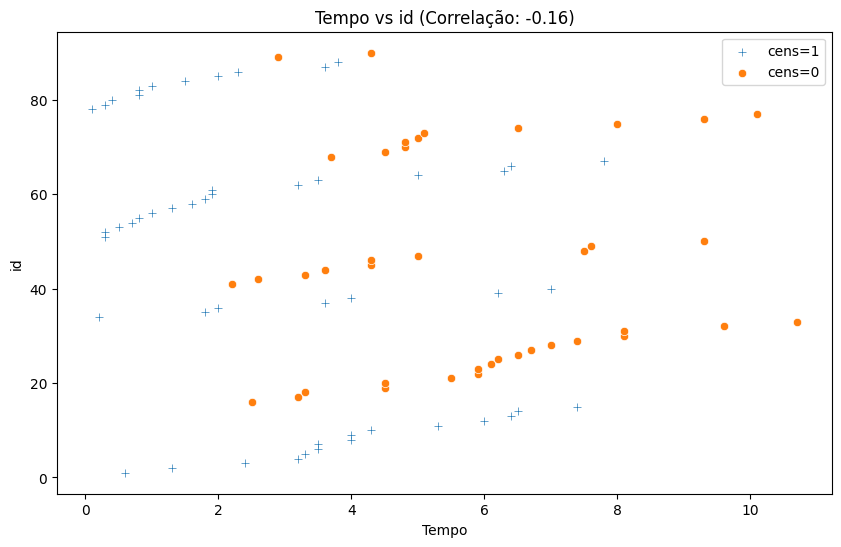

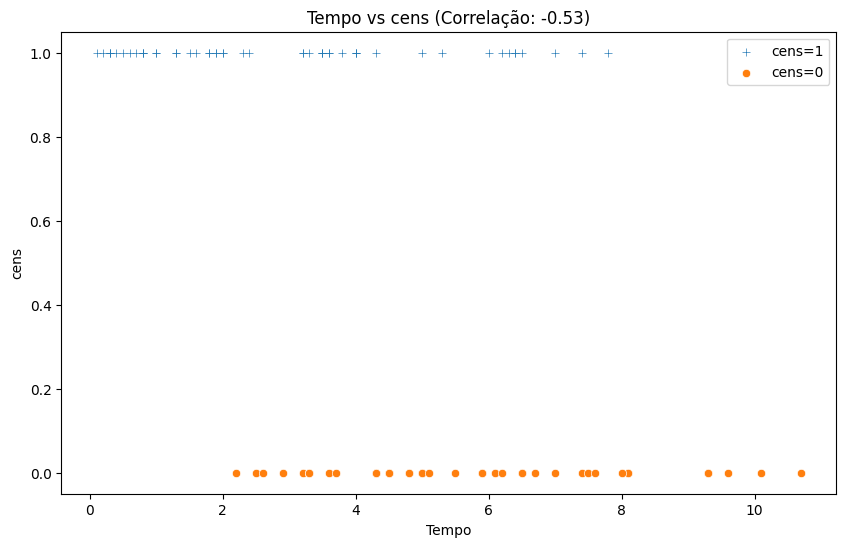

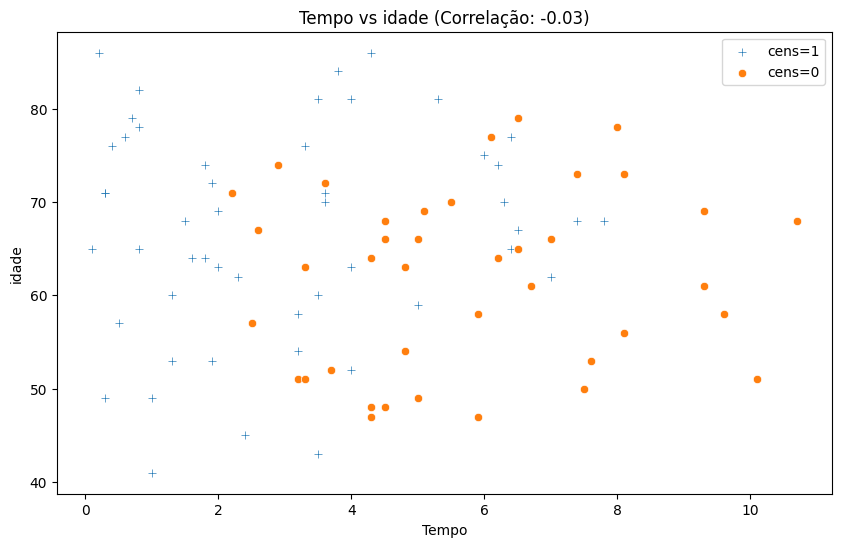

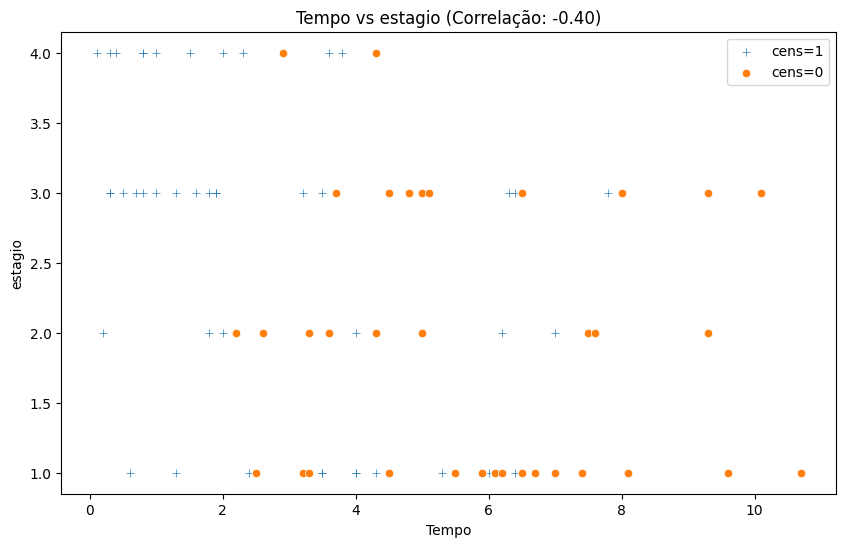

In [18]:
# Criando gráficos de dispersão com coeficientes de correlação e marcadores personalizados
# Obtendo as colunas numéricas, exceto 'tempos'
numeric_cols = data.select_dtypes(include='number').columns
numeric_cols = numeric_cols.drop('tempos')

# Plotando gráficos de dispersão para cada variável numérica em relação a 'tempos'
for col in numeric_cols:
    plt.figure(figsize=(10, 6))

    # Separando os dados pelos valores de 'cens'
    for cens_val in data['cens'].unique():
        subset_data = data[data['cens'] == cens_val]
        marker = '+' if cens_val == 1 else 'o'
        sns.scatterplot(data=subset_data, x='tempos', y=col, marker=marker, label=f'cens={cens_val}')

    # Calculando o coeficiente de correlação
    correlation = data['tempos'].corr(data[col])

    # Adicionando o título com o coeficiente de correlação
    plt.title(f'Tempo vs {col} (Correlação: {correlation:.2f})')
    plt.xlabel('Tempo')
    plt.ylabel(col)
    plt.legend()

    plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


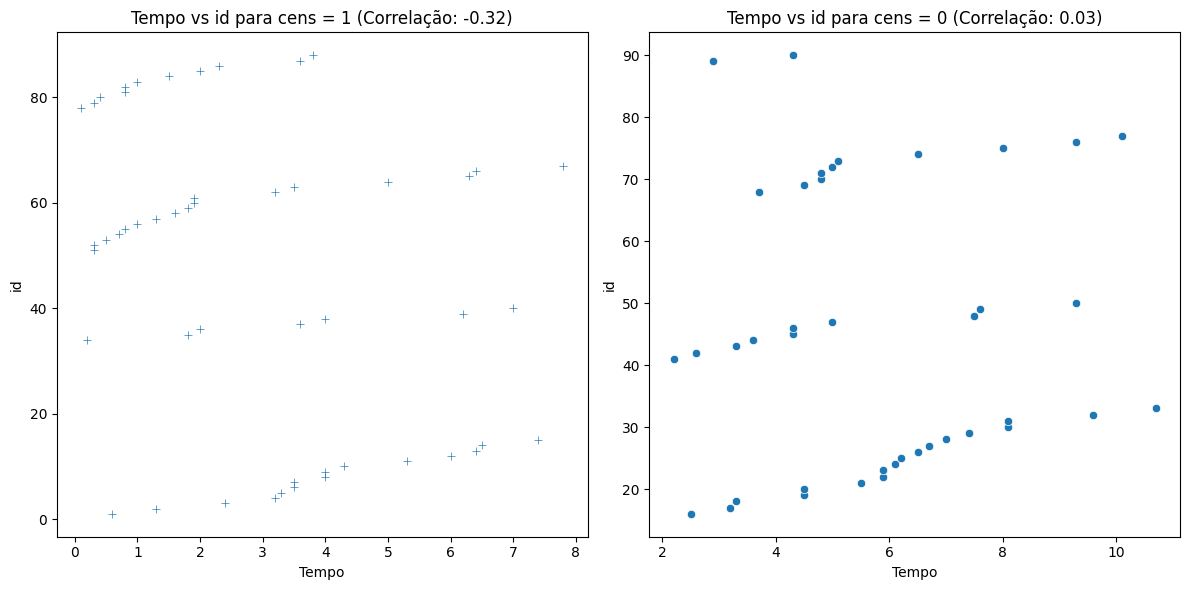

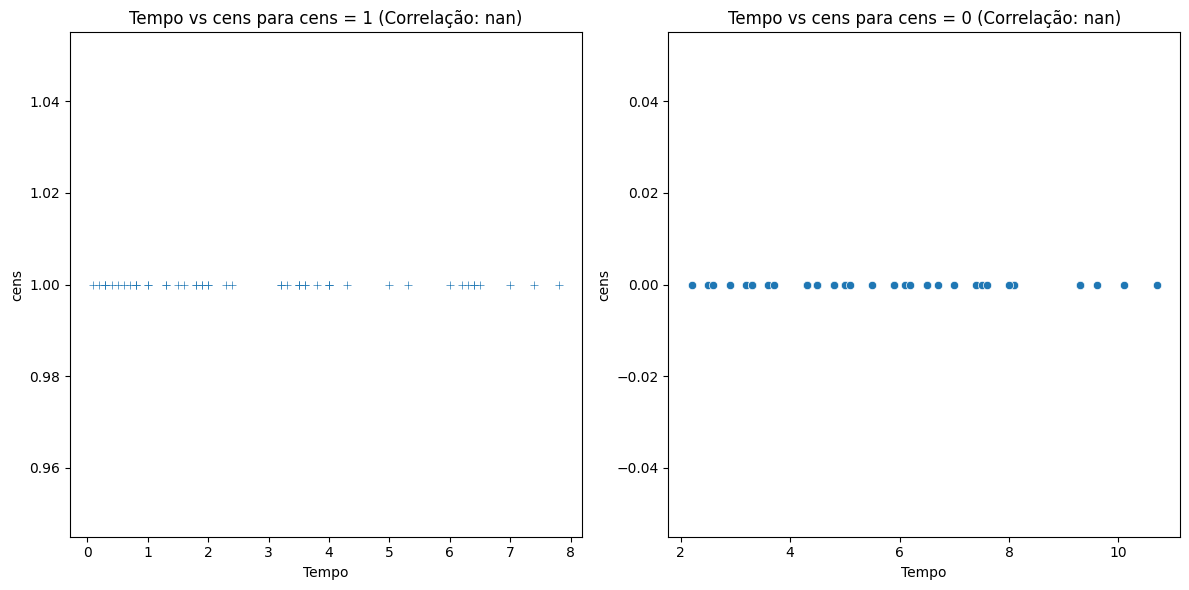

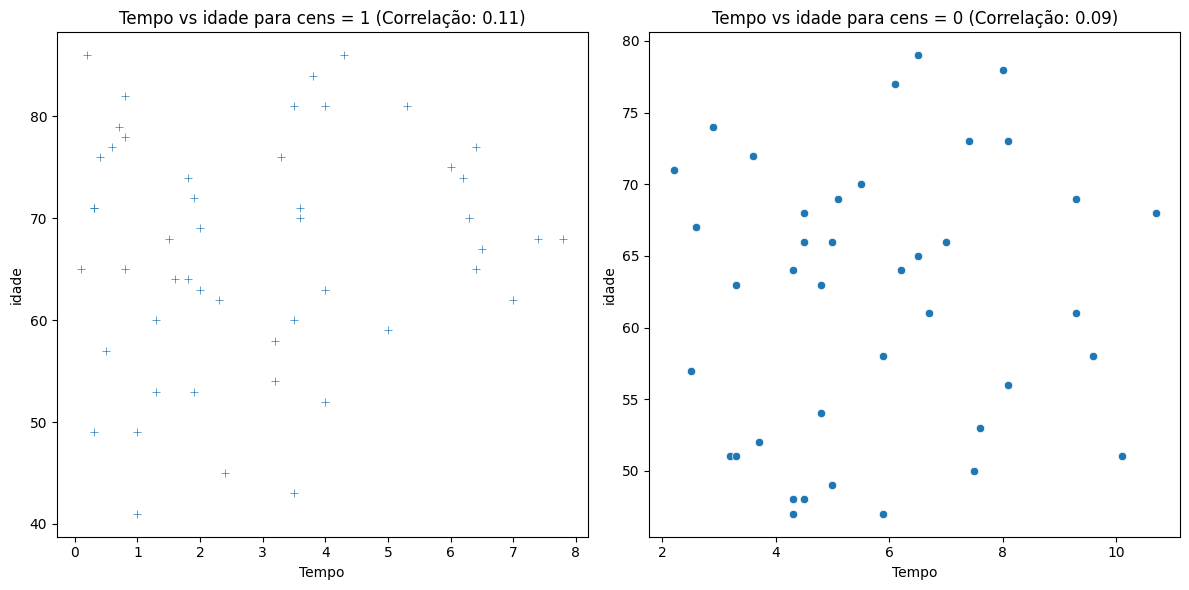

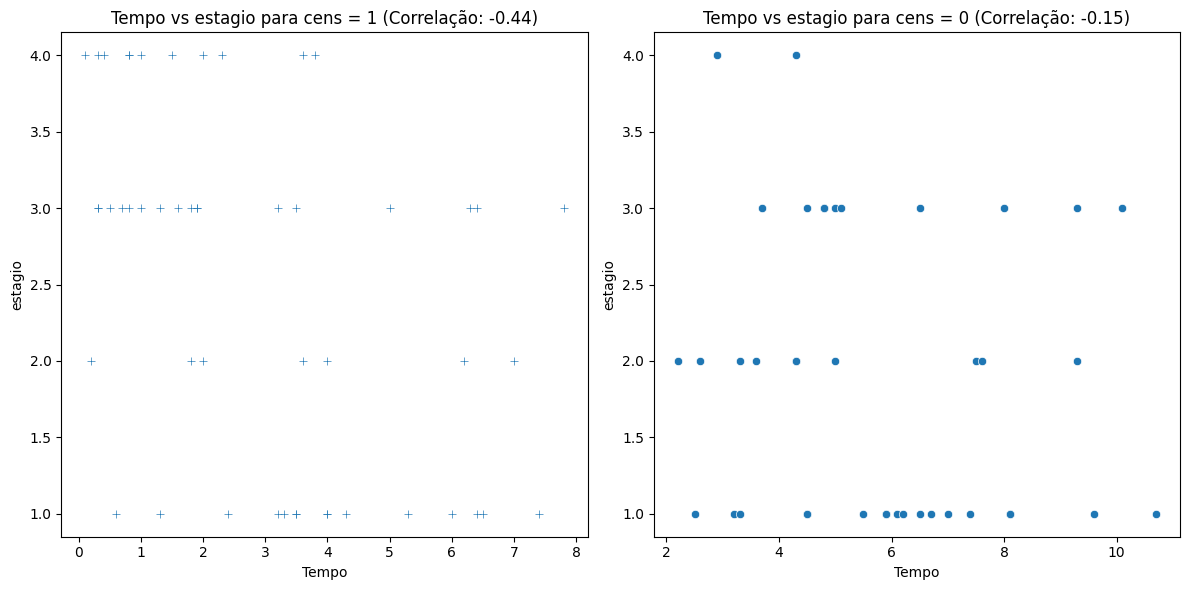

In [19]:
# Calculando as correlações para cada subconjunto
correlations = {}
for cens_val in data['cens'].unique():
    subset_data = data[data['cens'] == cens_val]
    correlations[cens_val] = {}
    for col in numeric_cols:
        correlations[cens_val][col] = subset_data['tempos'].corr(subset_data[col])

# Criando Gráficos de Dispersão com Coeficientes de Correlação e Marcadores Personalizados
for col in numeric_cols:
    plt.figure(figsize=(12, 6))

    # Gráfico de dispersão para cens = 1
    plt.subplot(121)  # 1 linha, 2 colunas, 1º subplot
    sns.scatterplot(data=data[data['cens'] == 1], x='tempos', y=col, marker='+')
    plt.title(f'Tempo vs {col} para cens = 1 (Correlação: {correlations[1][col]:.2f})')
    plt.xlabel('Tempo')
    plt.ylabel(col)

    # Gráfico de dispersão para cens = 0
    plt.subplot(122)  # 1 linha, 2 colunas, 2º subplot
    sns.scatterplot(data=data[data['cens'] == 0], x='tempos', y=col, marker='o')
    plt.title(f'Tempo vs {col} para cens = 0 (Correlação: {correlations[0][col]:.2f})')
    plt.xlabel('Tempo')
    plt.ylabel(col)

    # Ajustando o layout
    plt.tight_layout()

    plt.show()


Como é possível observar, as variáveis não são muito correlacionadas entre si, além disso, nem todas interações poderiam ser avaliadas com base no coeficiente de correlação linear de Pearson, uma vez que algumas dessas variáveis são dicotômicas e outras informativas, restando apenas analisar a relação entre 'tempos' e 'idade', que também não aparenta ser significativa, uma vez que a correlação entre elas está próxima de zero.

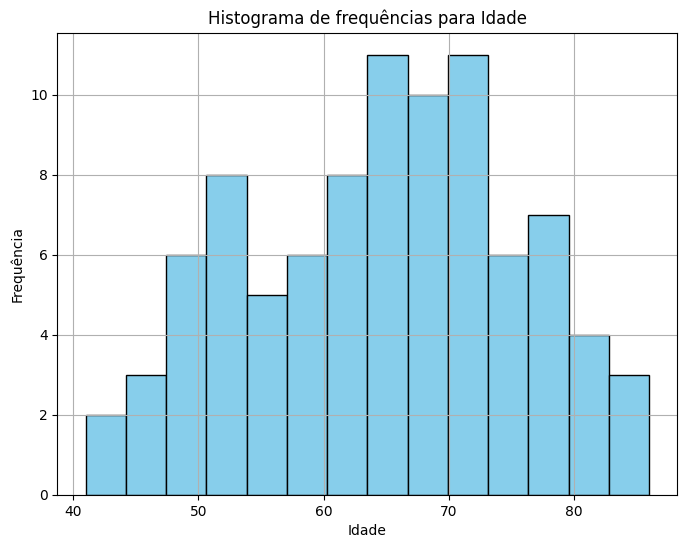

In [20]:
# Criando histograma para a variável 'idade' utilizando o matplotlib
plt.figure(figsize=(8, 6))
plt.hist(data['idade'], bins=14, color='skyblue', edgecolor='black')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de frequências para Idade')
plt.grid(True)
plt.show()

<ipython-input-21-c47212a010e5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='estagio', y='tempos', data=data, palette='Set3')


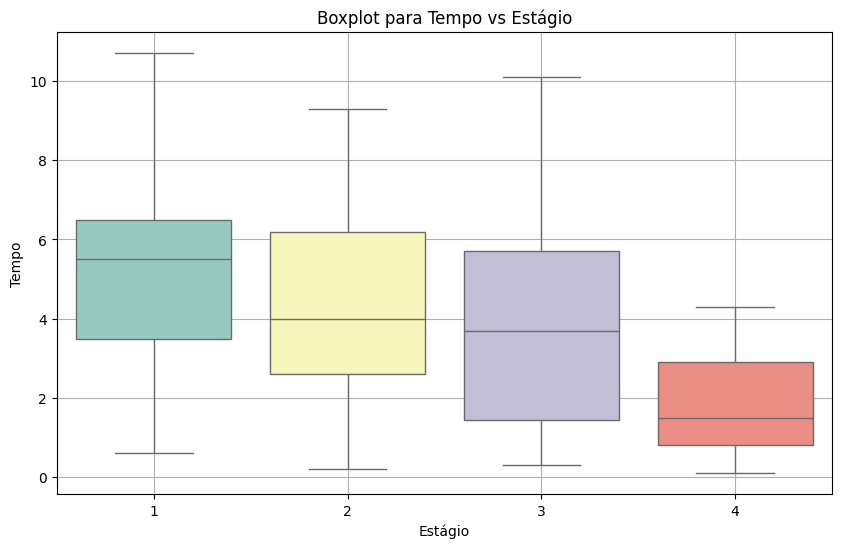

In [21]:
# Criando Boxplots com Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='estagio', y='tempos', data=data, palette='Set3')
plt.xlabel('Estágio')
plt.ylabel('Tempo')
plt.title('Boxplot para Tempo vs Estágio')
plt.grid(True)
plt.show()